## OpenCV Kernels: Image Blurring or Smoothing
### 1. Averaging

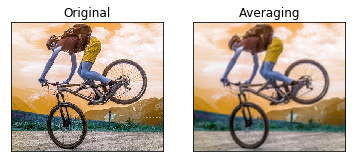

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('images/cycle.jpg')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.imshow("Averaging", dst)
cv2.waitKey(0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()
if(cv2.waitKey(0)):
 cv2.destroyAllWindows()

## 2. Gaussian Filtering

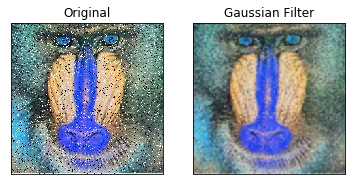

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('images/mandrill_spnoise_0.1.jpg')
blur = cv2.GaussianBlur(img,(5,5),0)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.imshow("Gaussian Filter", blur)
cv2.waitKey(0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()
if(cv2.waitKey(0)):
 cv2.destroyAllWindows()

### 3. Median Filtering

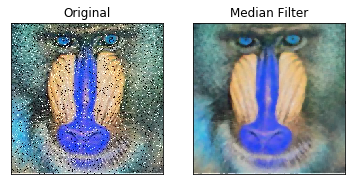

In [11]:
# median = cv2.medianBlur(img,5)
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('images/mandrill_spnoise_0.1.jpg')
median = cv2.medianBlur(img,5)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.imshow("Median Filter", median)
cv2.waitKey(0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()
if(cv2.waitKey(0)):
 cv2.destroyAllWindows()

## OPenCV Trackbar as color Palette

In [1]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()

## Thresholding

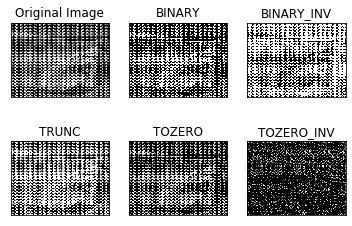

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/moonlanding.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## Usingn OpenCV Trackbar to Choose Color Ranges

In [3]:
# (python) range-detector --filter RGB --image /path/to/image.png
# or
# (python) range-detector --filter HSV --webcam

import cv2
import argparse
from operator import xor


def callback(value):
    pass


def setup_trackbars(range_filter):
    cv2.namedWindow("Trackbars", 0)

    for i in ["MIN", "MAX"]:
        v = 0 if i == "MIN" else 255

        for j in range_filter:
            cv2.createTrackbar("%s_%s" % (j, i), "Trackbars", v, 255, callback)


def get_arguments():
    ap = argparse.ArgumentParser()
    ap.add_argument('-f', '--filter', required=True,
                    help='Range filter. RGB or HSV')
    ap.add_argument('-i', '--image', required=False,
                    help='Path to the image')
    ap.add_argument('-w', '--webcam', required=False,
                    help='Use webcam', action='store_true')
    ap.add_argument('-p', '--preview', required=False,
                    help='Show a preview of the image after applying the mask',
                    action='store_true')
    args = vars(ap.parse_args())

    if not xor(bool(args['image']), bool(args['webcam'])):
        ap.error("Please specify only one image source")

    if not args['filter'].upper() in ['RGB', 'HSV']:
        ap.error("Please speciy a correct filter.")

    return args


def get_trackbar_values(range_filter):
    values = []

    for i in ["MIN", "MAX"]:
        for j in range_filter:
            v = cv2.getTrackbarPos("%s_%s" % (j, i), "Trackbars")
            values.append(v)

    return values


def main():
    args = get_arguments()

    range_filter = args['filter'].upper()

    if args['image']:
        image = cv2.imread(args['image'])

        if range_filter == 'RGB':
            frame_to_thresh = image.copy()
        else:
            frame_to_thresh = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    else:
        camera = cv2.VideoCapture(0)

    setup_trackbars(range_filter)

    while True:
        if args['webcam']:
            ret, image = camera.read()

            if not ret:
                break

            if range_filter == 'RGB':
                frame_to_thresh = image.copy()
            else:
                frame_to_thresh = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        v1_min, v2_min, v3_min, v1_max, v2_max, v3_max = get_trackbar_values(range_filter)

        thresh = cv2.inRange(frame_to_thresh, (v1_min, v2_min, v3_min), (v1_max, v2_max, v3_max))

        if args['preview']:
            preview = cv2.bitwise_and(image, image, mask=thresh)
            cv2.imshow("Preview", preview)
        else:
            cv2.imshow("Original", image)
            cv2.imshow("Thresh", thresh)

        if cv2.waitKey(1) & 0xFF is ord('q'):
            break


if __name__ == '__main__':
    main()

/bin/sh: 1: --filter: not found


usage: ipykernel_launcher.py [-h] -f FILTER [-i IMAGE] [-w] [-p]
ipykernel_launcher.py: error: Please specify only one image source


SystemExit: 2

## Tracking Object Movement 

In [1]:
# python object_movement.py

# import the necessary packages
from collections import deque
from imutils.video import VideoStream
import numpy as np
import argparse
import cv2
import imutils
import time

buffer = 32

# define the lower and upper boundaries of the "green"
# ball in the HSV color space
greenLower = (42, 100, 100)
greenUpper = (91, 255, 255)

# initialize the list of tracked points, the frame counter,
# and the coordinate deltas
pts = deque(maxlen=buffer)
counter = 0
(dX, dY) = (0, 0)
direction = ""

# if a video path was not supplied, grab the reference
# to the webcam
vs = cv2.VideoCapture(0)

# allow the camera or video file to warm up
time.sleep(2.0)

# keep looping
while True:
    # grab the current frame
    (_, frame) = vs.read()

    # resize the frame, blur it, and convert it to the HSV
    # color space
    frame = imutils.resize(frame, width=600)
    blurred = cv2.GaussianBlur(frame, (11, 11), 0)
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)

    # construct a mask for the color "green", then perform
    # a series of dilations and erosions to remove any small
    # blobs left in the mask
    mask = cv2.inRange(hsv, greenLower, greenUpper)
    mask = cv2.erode(mask, None, iterations=2)
    mask = cv2.dilate(mask, None, iterations=2)

    # find contours in the mask and initialize the current
    # (x, y) center of the ball
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    center = None

    # only proceed if at least one contour was found
    if len(cnts) > 0:
        # find the largest contour in the mask, then use
        # it to compute the minimum enclosing circle and
        # centroid
        c = max(cnts, key=cv2.contourArea)
        ((x, y), radius) = cv2.minEnclosingCircle(c)
        M = cv2.moments(c)
        center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

        # only proceed if the radius meets a minimum size
        if radius > 10:
            # draw the circle and centroid on the frame,
            # then update the list of tracked points
            cv2.circle(frame, (int(x), int(y)), int(radius),
                (0, 255, 255), 2)
            cv2.circle(frame, center, 5, (0, 0, 255), -1)
            pts.appendleft(center)

    # loop over the set of tracked points
    for i in np.arange(1, len(pts)):
        # if either of the tracked points are None, ignore
        # them
        if pts[i - 1] is None or pts[i] is None:
            continue

        # check to see if enough points have been accumulated in
        # the buffer
        if counter >= 10 and i == 1 and len(pts) >= 10 and pts[-10] is not None:
            # compute the difference between the x and y
            # coordinates and re-initialize the direction
            # text variables
            dX = pts[-10][0] - pts[i][0]
            dY = pts[-10][1] - pts[i][1]
            (dirX, dirY) = ("", "")

            # ensure there is significant movement in the
            # x-direction
            if np.abs(dX) > 20:
                dirX = "East" if np.sign(dX) == 1 else "West"

            # ensure there is significant movement in the
            # y-direction
            if np.abs(dY) > 20:
                dirY = "North" if np.sign(dY) == 1 else "South"

            # handle when both directions are non-empty
            if dirX != "" and dirY != "":
                direction = "{}-{}".format(dirY, dirX)

            # otherwise, only one direction is non-empty
            else:
                direction = dirX if dirX != "" else dirY

        # otherwise, compute the thickness of the line and
        # draw the connecting lines
        thickness = int(np.sqrt(buffer / float(i + 1)) * 2.5)
        cv2.line(frame, pts[i - 1], pts[i], (0, 0, 255), thickness)

    # show the movement deltas and the direction of movement on
    # the frame
    cv2.putText(frame, direction, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
        0.65, (0, 0, 255), 3)
    cv2.putText(frame, "dx: {}, dy: {}".format(dX, dY),
        (10, frame.shape[0] - 10), cv2.FONT_HERSHEY_SIMPLEX,
        0.35, (0, 0, 255), 1)

    # show the frame to our screen and increment the frame counter
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    counter += 1

    # if the 'q' key is pressed, stop the loop
    if key == ord("q"):
        break
        
    
vs.release()
# close all windows
cv2.destroyAllWindows()

## Tracking Movement of multiple objects

In [ ]:
from collections import deque
import numpy as np
import cv2
import imutils
import time

bufferSize = 16

OrangeIndicate, GreenIndicate = False, False

colorRanges = [
        ((42, 100, 100), (91, 255, 255), "Green"),
        ((0, 134, 183), (97, 255, 255), "Orange")]

pts = deque([], maxlen=bufferSize)
pts1 = deque([], maxlen=bufferSize)

counter, counter1 = 0, 0

(dX, dY), (dXB, dYB) = (0, 0), (0, 0)

direction = ""
directionB = ""

vs = cv2.VideoCapture(0)

time.sleep(2.0)

while True:
    # grab the current frame
    (grabbed, frame) = vs.read()
    frame = imutils.resize(frame, width=600)
    blurred = cv2.GaussianBlur(frame, (11, 11), 0)
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)

    for (lower, upper, colorName) in colorRanges:
        mask = cv2.inRange(hsv, lower, upper)
        mask = cv2.erode(mask, None, iterations=2)
        mask = cv2.dilate(mask, None, iterations=2)

        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        centerGreen, centerOrange = None, None
        # only proceed if at least one contour was found

        if len(cnts) > 0:
            c = max(cnts, key=cv2.contourArea)
            ((x, y), radius) = cv2.minEnclosingCircle(c)
            M = cv2.moments(c)
            MB = cv2.moments(c)
            centerGreen = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
            centerOrange = (int(MB["m10"] / MB["m00"]), int(MB["m01"] / MB["m00"]))

            # only proceed if the radius meets a minimum size
            if radius > 40 and colorName == "Green":
                cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2)
                cv2.putText(frame, colorName, centerGreen, cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 2)
                cv2.circle(frame, centerGreen, 5, (0, 0, 255), -1)
                pts.appendleft(centerGreen)
                if not GreenIndicate:
                    GreenIndicate = True
                    # print("Green Detect = ", GreenIndicate)
            else:
                GreenIndicate = False
                # print("Green Detect = ", GreenIndicate)

            if radius > 40 and colorName == "Orange":
                cv2.circle(frame, (int(x), int(y)), int(radius), (255, 0, 0), 2)
                cv2.putText(frame, colorName, centerOrange, cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2)
                cv2.circle(frame, centerOrange, 5, (0, 0, 255), -1)
                pts1.appendleft(centerOrange)
                if not OrangeIndicate:
                    OrangeIndicate = True
                    # print("Orange Detect = ", OrangeIndicate)
            else:
                OrangeIndicate = False
               #  print("Orange Detect = ", OrangeIndicate)

        for i in np.arange(1, len(pts)):
            # if either of the tracked points are None, ignore them
            if pts[i - 1] is None or pts[i] is None:
                continue

            # check to see if enough points have been accumulated in the buffer
            if counter >= 10 and i == 1 and len(pts) == bufferSize:
                dX = pts[-10][0] - pts[i][0]
                dY = pts[-10][1] - pts[i][1]
                (dirX, dirY) = ("", "")

                if np.abs(dX) > 20:
                    if np.sign(dX) == 1:
                        dirX = "Right"
                    else:
                        dirX = "Left"
                    direction = dirX

            thickness = int(np.sqrt(bufferSize / float(i + 1)) * 2.5)
            cv2.line(frame, pts[i - 1], pts[i], (0, 0, 255), thickness)
        cv2.putText(frame, direction, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 255), 3)
        cv2.putText(frame, "dx: {}, dy: {}".format(dX, dY), (10, frame.shape[0] - 22), cv2.FONT_HERSHEY_SIMPLEX,
                    0.35, (0, 0, 255), 1)

        for j in np.arange(1, len(pts1)):

            if pts1[j - 1] is None or pts1[j] is None:
                continue

            if counter1 >= 10 and j == 1 and len(pts1) == bufferSize:
                dXB = pts1[-10][0] - pts1[j][0]
                dYB = pts1[-10][1] - pts1[j][1]
                (dirXB, dirYB) = ("", "")

                if np.abs(dXB) > 20:
                    if np.sign(dXB) == 1:
                        dirXB = "Right"
                    else:
                        dirXB = "Left"
                    directionB = dirXB

            thicknessB = int(np.sqrt(bufferSize / float(j + 1)) * 2.5)
            cv2.line(frame, pts1[j - 1], pts1[j], (0, 0, 255), thicknessB)

        cv2.putText(frame, directionB, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 3)
        cv2.putText(frame, "dxB: {}, dyB: {}".format(dXB, dYB), (10, frame.shape[0] - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.35, (255, 0, 0), 1)
    # show the frame to our screen and increment the frame counter
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    counter += 1
    counter1 += 1
    if key == ord("q"):
        break
vs.release()
cv2.destroyAllWindows()

## Canny Edge Detector

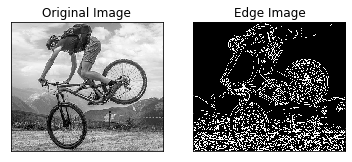

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('images/cycle.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Lapacian and Sobel Edge Detector

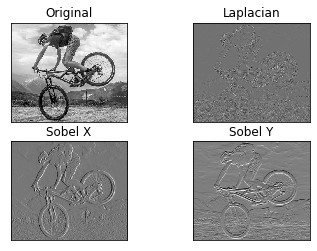

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/cycle.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()